In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Load the dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset into a pandas DataFrame
import io
data = pd.read_csv(io.BytesIO(uploaded['bank.csv']))

# Define the features and target
X = data.drop('y', axis=1)
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convert target to binary

# List of categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing pipeline for categorical data
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Preprocessing pipeline for numerical data
numerical_transformer = StandardScaler()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline that preprocesses the data, applies SMOTE, and then applies logistic regression
model_pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),
                                    ('smote', SMOTE(random_state=42)),
                                    ('classifier', LogisticRegression(random_state=42))])

# Define the parameter grid for logistic regression
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga']
}

Saving bank.csv to bank.csv


In [3]:
# Set up GridSearchCV
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [4]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

best_params = grid_search.best_params_
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Best Parameters: {best_params}')

Accuracy: 0.8342
Precision: 0.3803
Recall: 0.7632
F1 Score: 0.5077
Best Parameters: {'classifier__C': 10, 'classifier__solver': 'saga'}


In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Load the dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset into a pandas DataFrame
import io
data = pd.read_csv(io.BytesIO(uploaded['bank.csv']))

# Define the features and target
X = data.drop('y', axis=1)
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convert target to binary

# List of categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing pipeline for categorical data
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Preprocessing pipeline for numerical data
numerical_transformer = StandardScaler()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline that preprocesses the data, applies SMOTE, and then applies logistic regression
model_pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),
                                    ('smote', SMOTE(random_state=42)),
                                    ('classifier', LogisticRegression(random_state=42))])

# Define the parameter grid for logistic regression
param_grid_logreg = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga']
}

# Set up GridSearchCV for logistic regression
grid_search_logreg = GridSearchCV(model_pipeline, param_grid_logreg, cv=5, scoring='f1', n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)
best_logreg_model = grid_search_logreg.best_estimator_

# Evaluate logistic regression
y_pred_logreg = best_logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
best_params_logreg = grid_search_logreg.best_params_

print(f'Logistic Regression - Accuracy: {accuracy_logreg:.4f}')
print(f'Logistic Regression - Precision: {precision_logreg:.4f}')
print(f'Logistic Regression - Recall: {recall_logreg:.4f}')
print(f'Logistic Regression - F1 Score: {f1_logreg:.4f}')
print(f'Logistic Regression - Best Parameters: {best_params_logreg}')

# Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

model_pipeline_rf = ImbPipeline(steps=[('preprocessor', preprocessor),
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier', RandomForestClassifier(random_state=42))])

grid_search_rf = GridSearchCV(model_pipeline_rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Evaluate Random Forest
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
best_params_rf = grid_search_rf.best_params_

print(f'Random Forest - Accuracy: {accuracy_rf:.4f}')
print(f'Random Forest - Precision: {precision_rf:.4f}')
print(f'Random Forest - Recall: {recall_rf:.4f}')
print(f'Random Forest - F1 Score: {f1_rf:.4f}')
print(f'Random Forest - Best Parameters: {best_params_rf}')

# Gradient Boosting
param_grid_gb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

model_pipeline_gb = ImbPipeline(steps=[('preprocessor', preprocessor),
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier', GradientBoostingClassifier(random_state=42))])

grid_search_gb = GridSearchCV(model_pipeline_gb, param_grid_gb, cv=5, scoring='f1', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_

# Evaluate Gradient Boosting
y_pred_gb = best_gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
best_params_gb = grid_search_gb.best_params_

print(f'Gradient Boosting - Accuracy: {accuracy_gb:.4f}')
print(f'Gradient Boosting - Precision: {precision_gb:.4f}')
print(f'Gradient Boosting - Recall: {recall_gb:.4f}')
print(f'Gradient Boosting - F1 Score: {f1_gb:.4f}')
print(f'Gradient Boosting - Best Parameters: {best_params_gb}')

Saving bank.csv to bank.csv


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression - Accuracy: 0.8342
Logistic Regression - Precision: 0.3803
Logistic Regression - Recall: 0.7632
Logistic Regression - F1 Score: 0.5077
Logistic Regression - Best Parameters: {'classifier__C': 10, 'classifier__solver': 'saga'}
Random Forest - Accuracy: 0.8777
Random Forest - Precision: 0.4628
Random Forest - Recall: 0.5724
Random Forest - F1 Score: 0.5118
Random Forest - Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Gradient Boosting - Accuracy: 0.8806
Gradient Boosting - Precision: 0.4722
Gradient Boosting - Recall: 0.5592
Gradient Boosting - F1 Score: 0.5120
Gradient Boosting - Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}


In [6]:
# Install LightGBM
!pip install lightgbm

# Import necessary libraries
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline

# Define the parameter grid for LightGBM
param_grid_lgb = {
    'classifier__num_leaves': [31, 50, 100],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__n_estimators': [100, 200, 300]
}

# Create a pipeline that preprocesses the data, applies SMOTE, and then applies LightGBM
model_pipeline_lgb = ImbPipeline(steps=[('preprocessor', preprocessor),
                                        ('smote', SMOTE(random_state=42)),
                                        ('classifier', lgb.LGBMClassifier(random_state=42))])

# Set up GridSearchCV for LightGBM
grid_search_lgb = GridSearchCV(model_pipeline_lgb, param_grid_lgb, cv=5, scoring='f1', n_jobs=-1)
grid_search_lgb.fit(X_train, y_train)
best_lgb_model = grid_search_lgb.best_estimator_

# Evaluate LightGBM
y_pred_lgb = best_lgb_model.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)
best_params_lgb = grid_search_lgb.best_params_

print(f'LightGBM - Accuracy: {accuracy_lgb:.4f}')
print(f'LightGBM - Precision: {precision_lgb:.4f}')
print(f'LightGBM - Recall: {recall_lgb:.4f}')
print(f'LightGBM - F1 Score: {f1_lgb:.4f}')
print(f'LightGBM - Best Parameters: {best_params_lgb}')

[LightGBM] [Info] Number of positive: 2795, number of negative: 2795
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6332
[LightGBM] [Info] Number of data points in the train set: 5590, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM - Accuracy: 0.8909
LightGBM - Precision: 0.5109
LightGBM - Recall: 0.6184
LightGBM - F1 Score: 0.5595
LightGBM - Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 300, 'classifier__num_leaves': 31}


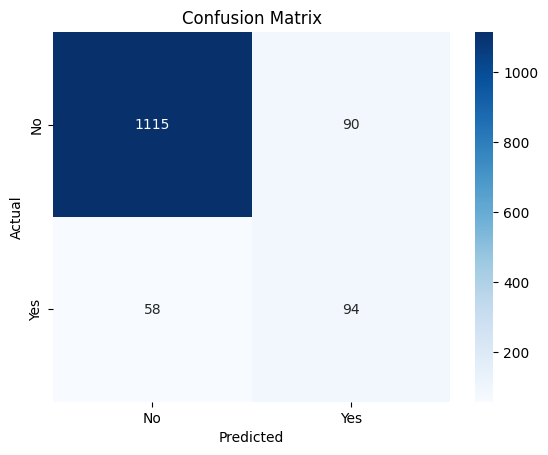

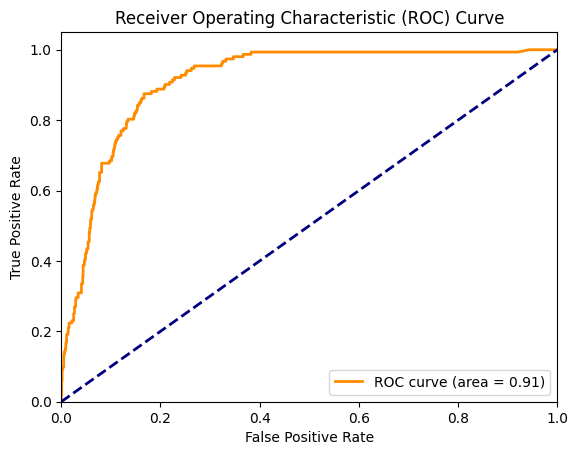

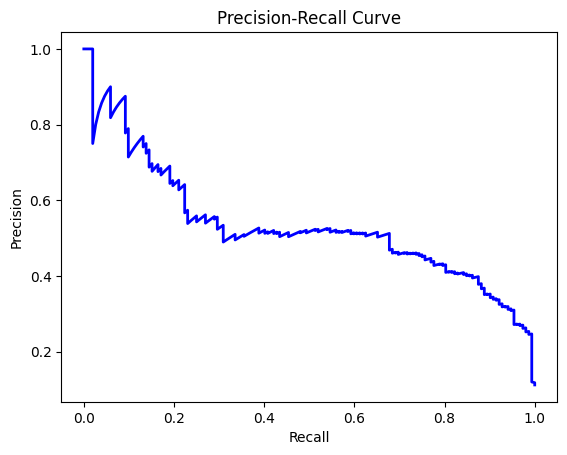

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Predict probabilities for the test set
y_pred_prob = best_lgb_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()